In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [3]:
df =pd.read_csv('train.csv')

In [4]:
df.columns

Index(['Sample ID', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Class'],
      dtype='object')

In [5]:
col = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25']

In [8]:

    y =df['Class']
    X =df[col]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23)

In [4]:
d2 = pd.concat([df[df['Class'] ==1],df[df['Class'] ==3]])
d2.head()

,Sample ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Class
3,4,-1.436968,1.467864,0.858960,0.139044,0.295012,-1.267011,-0.710657,0.708872,1.522084,...,0.468328,-0.574399,-0.022129,0.443826,-0.892087,-0.909954,-0.748736,-1.263272,0.420825,1
15,16,-1.348280,1.012126,0.910131,0.276977,0.560933,-1.761370,-1.333418,0.538685,0.583936,...,0.337739,-0.163777,-0.605055,0.454363,0.789549,-0.849614,-0.961392,-0.699282,0.686878,1
18,19,-1.551247,0.497643,0.110804,-0.035909,-1.021594,1.152638,1.178674,0.732184,-0.667161,...,-1.329882,-0.773243,-0.110872,-0.135130,0.537114,0.884199,-0.497205,-0.401393,-0.529742,1
22,23,-1.649790,1.195070,0.662224,-0.315146,-0.539159,0.295331,1.035297,1.171727,0.878921,...,-0.459761,0.293954,0.576226,0.353060,0.204426,0.348188,0.301840,0.090025,-0.763669,1
60,61,-1.646558,1.098895,0.806498,-0.093386,0.433482,-1.448327,-0.087165,0.655899,1.320511,...,-0.263808,-0.243187,-0.208651,0.187786,0.928247,-0.058229,-0.421872,0.035878,0.485241,1


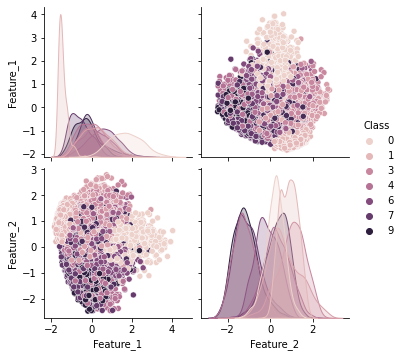

In [6]:
sns.pairplot(df[['Feature_1','Feature_2','Class']], hue='Class')

In [27]:

score =0
while score < 0.98:
    

    y =df['Class']
    X =df[col]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23)


    
    svc= SVC()
    def my_SVM_report(X_train, y_train, X_test,y_test, C=9,gamma=0.05 ,kernel='rbf'):
        svc= SVC(C=C, gamma=gamma, kernel=kernel)
        ovo_classifier = OneVsOneClassifier(svc)
        ovo_classifier = ovo_classifier.fit(X_train, y_train)
    
        #matrix = plot_confusion_matrix(ovo_classifier, X_test, y_test,
                               #  cmap=plt.cm.Blues,
                                # normalize='true')
    
        score = ovo_classifier.score(X_test,y_test)
        return score,ovo_classifier

    score,ovo_classifier = my_SVM_report(X_train, y_train, X_test,y_test)
    score
    print(score)

0.9635869565217391


In [28]:
score

0.9635869565217391

<bound method OneVsOneClassifier.decision_function of OneVsOneClassifier(estimator=SVC(C=9, gamma=0.05))>

# Hyperparameter Tuning

In [9]:
def my_SVM_report(X_train, y_train, X_test,y_test, C=1,gamma='scale' ,kernel='rbf'):
    
    svc= SVC(C=C, gamma=gamma, kernel=kernel)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier = ovo_classifier.fit(X_train, y_train)
    
    score = ovo_classifier.score(X_test,y_test)
    return score

In [10]:
C_list = []
G_list = []
K_list = []
S_list = []
for i in [10,9,100,1000]:
    for j in ['scale',0.1,0.01]:
        for k in ['rbf']:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23)
            score = my_SVM_report(X_train, y_train, X_test,y_test, C=i,gamma=j ,kernel=k)
            C_list.append(i)
            G_list.append(j)
            K_list.append(k)
            S_list.append(score)
            print(score)

0.9641304347826087
0.9722826086956522
0.9548913043478261
0.9684782608695652
0.9657608695652173
0.9527173913043478
0.9603260869565218
0.9597826086956521
0.9451086956521739
0.9625
0.9695652173913043
0.9538043478260869


In [11]:
grid_df= pd.DataFrame(C_list)
grid_df.columns = ['C']
grid_df['Gammma'] = G_list
grid_df['Kernel'] = K_list
grid_df['score'] = S_list

In [12]:
grid_df

,C,Gammma,Kernel,score
0,10,scale,rbf,0.964130
1,10,0.1,rbf,0.972283
2,10,0.01,rbf,0.954891
3,9,scale,rbf,0.968478
4,9,0.1,rbf,0.965761
5,9,0.01,rbf,0.952717
6,100,scale,rbf,0.960326
7,100,0.1,rbf,0.959783
8,100,0.01,rbf,0.945109
9,1000,scale,rbf,0.962500


# Training for final prediction

In [12]:
y =df['Class']
X =df[col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)


from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col)


In [135]:
test = pd.read_csv('test.csv')
test[col]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,0.036550,0.641572,-0.519057,0.460712,0.570700,0.222309,0.087710,-0.318400,-1.973283,0.708141,...,-1.049741,-1.672266,1.059074,0.206516,0.792531,0.844650,-0.784680,0.937180,0.043382,0.583525
1,-1.004027,0.534250,-0.259404,0.310052,0.755525,-0.267865,0.803048,0.824546,-0.017057,-0.439858,...,-0.377550,0.455779,-1.574711,-0.374946,1.361794,-0.062464,1.167719,1.231902,0.462682,0.697925
2,-1.147219,0.334078,-0.389740,-0.508234,0.184723,1.956903,1.366785,0.906050,-0.138883,-1.956578,...,0.316459,-1.694966,-0.511869,0.123451,-1.174886,0.341067,0.196467,-0.686200,0.509537,0.993518
3,-0.506680,-1.361191,-0.576784,0.064672,-0.049516,-0.111892,0.502428,-0.332201,-1.203807,-1.206357,...,-0.187222,-1.211090,-1.062384,-0.162851,1.043950,0.482891,-0.582693,-0.358026,-1.188908,-0.221639
4,-1.546926,0.966659,0.460473,0.139549,-0.777357,-0.015657,1.188006,1.035923,-0.326310,0.671796,...,0.404783,-0.386269,-0.727555,0.454785,-1.020171,0.171097,0.059959,0.638194,1.095800,-0.612439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.582811,0.864609,0.612178,0.358372,-1.142419,0.675760,0.986953,0.802516,-0.294720,0.286791,...,0.592820,-0.717194,-0.008238,0.278941,-1.016759,0.229739,1.066610,0.164713,0.368491,-1.329390
1996,1.744843,0.623868,-0.469064,1.619294,-0.944036,-0.744784,0.073100,0.934007,-1.300712,1.010739,...,-1.452097,0.099856,0.092569,0.828947,-0.176099,0.073565,0.988890,-1.063531,0.467692,-0.822960
1997,-1.745249,0.983623,0.502273,0.282896,-0.758385,-0.294727,0.434684,0.807753,0.797022,0.503041,...,0.058739,-0.481010,-0.342823,0.254859,0.080882,0.159286,0.074396,0.510993,0.319498,-0.359889
1998,-1.235580,-0.180367,0.232004,-1.738035,0.262606,-0.283989,1.539323,-0.661559,1.040505,1.726944,...,0.455763,-1.096604,0.034090,0.154824,0.432887,1.724974,-0.830066,1.066209,1.013639,-0.291611


In [136]:
y_hat = pd.DataFrame(ovo_classifier.predict(test[col]))

In [137]:
y_hat.columns=['Class']

In [138]:
y_hat

,Class
0,8
1,7
2,1
3,7
4,1
...,...
1995,1
1996,0
1997,1
1998,9


In [139]:
y_hat.to_csv('submission 22.csv')